In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [13]:
import schemdraw
import schemdraw.segments as seg
from schemdraw.elements import Element
import schemdraw.elements as elm

In [29]:
class CustomElement(Element):
    """
    Custom element for a box with a custom number of inputs on the left and outputs on the right.

    Parameters
    ----------
    inputCount : int
        Number of input terminals on the left.
    outputCount : int
        Number of output terminals on the right.
    boxWidth : float, optional
        Width of the box.
    boxHeight : float, optional
        Height of the box.
    """

    def __init__(self, inputCount: int = 2, outputCount: int = 2, boxWidth: float = 2.0, boxHeight: float = 2.0, **kwargs):
        super().__init__(**kwargs)
        self.inputCount = inputCount
        self.outputCount = outputCount
        self.boxWidth = boxWidth
        self.boxHeight = boxHeight
        self.segments.append(seg.Segment([(-self.boxWidth/2, -self.boxHeight/2), (self.boxWidth/2, -self.boxHeight/2)]))
        self.segments.append(seg.Segment([(self.boxWidth/2, -self.boxHeight/2), (self.boxWidth/2, self.boxHeight/2)]))
        self.segments.append(seg.Segment([(self.boxWidth/2, self.boxHeight/2), (-self.boxWidth/2, self.boxHeight/2)]))
        self.segments.append(seg.Segment([(-self.boxWidth/2, self.boxHeight/2), (-self.boxWidth/2, -self.boxHeight/2)]))

        # Draw inputs on the left
        for i in range(self.inputCount):
            y = self.boxHeight/2 - (i + 1) * self.boxHeight / (self.inputCount + 1)
            self.segments.append(seg.Segment([(-self.boxWidth/2 - 0.5, y), (-self.boxWidth/2, y)]))
            self.anchors[f"i{i}"] = (-self.boxWidth/2 - 0.5, y)

        # Draw outputs on the right
        for i in range(self.outputCount):
            y = self.boxHeight/2 - (i + 1) * self.boxHeight / (self.outputCount + 1)
            self.segments.append(seg.Segment([(self.boxWidth/2, y), (self.boxWidth/2 + 0.5, y)]))
            self.anchors[f"o{i}"] = (self.boxWidth/2 + 0.5, y)

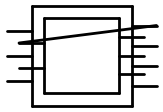

In [30]:
with schemdraw.Drawing() as d:
    a = CustomElement(inputCount=3, outputCount=4)
    b = CustomElement(inputCount=2, outputCount=3, boxWidth=1.5, boxHeight=1.5).right()
    elm.Wire("-").at(a.anchors['o0']).to(b.anchors['i0'])
    d.draw()

In [ ]:
with schemdraw.Drawing() as d:
    a = elm.Ic(pins=[elm.IcPin('i0', side="left"), elm.IcPin('i1', side="left"), elm.IcPin('o0', side="right", anchorname='o0')])
    d.move_from(a.center, dx=5)
    b = elm.Ic(pins=[elm.IcPin('i0', side="left", anchorname="i0"),elm.IcPin('i1', side="left", anchorname="i1"), elm.IcPin('o0', side="right", anchorname='o0')])
    # elm.Wire("-").at(a.o0).to(b.i0)
    # elm.Wire("-").at(a.absanchors["o0"]).to(b.absanchors["i0"]) #current work around?
    # elm.Wire("-").at(a["o0"]).to(b["i0"]) # Allow syntax like this
    print(a.i0)
    print(a.center)
    print(b.center)
    d.draw()

NameError: name 'schemdraw' is not defined

## Placing Custom Elements in Schemdraw

There are several ways to position elements in schemdraw:

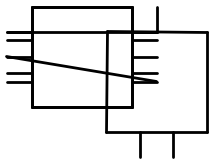

In [31]:
# Method 1: Using directional methods (.right(), .left(), .up(), .down())
with schemdraw.Drawing() as d:
    a = CustomElement(inputCount=2, outputCount=3)
    # Place element b to the right of a
    b = CustomElement(inputCount=3, outputCount=2).right()
    # Place element c below a
    c = CustomElement(inputCount=1, outputCount=2).at(a.anchors['o2']).down()
    # Connect elements with wires
    elm.Wire("-").at(a.anchors['o0']).to(b.anchors['i0'])
    elm.Wire("-").at(a.anchors['o2']).to(c.anchors['i0'])
    d.draw()

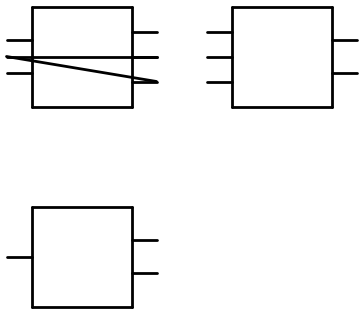

In [32]:
# Method 2: Using absolute coordinates with .at((x, y))
with schemdraw.Drawing() as d:
    # Place elements at specific coordinates
    a = CustomElement(inputCount=2, outputCount=3).at((0, 0))
    b = CustomElement(inputCount=3, outputCount=2).at((4, 0))
    c = CustomElement(inputCount=1, outputCount=2).at((0, -4))
    
    # Connect with wires
    elm.Wire("-").at(a.anchors['o1']).to(b.anchors['i1'])
    elm.Wire("-").at(a.anchors['o2']).to(c.anchors['i0'])
    d.draw()

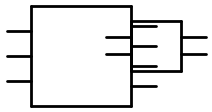

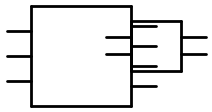

TypeError: Element.right() takes 1 positional argument but 2 were given

In [33]:
# Method 3: Using anchors with .at() and relative positioning
with schemdraw.Drawing() as d:
    a = CustomElement(inputCount=3, outputCount=4, boxWidth=2, boxHeight=2)
    
    # Position element b at a specific anchor point of a
    b = CustomElement(inputCount=2, outputCount=2, boxWidth=1, boxHeight=1).at(a.anchors['o1']).right(2)
    
    # Position element c below b
    c = CustomElement(inputCount=1, outputCount=3, boxWidth=1.5, boxHeight=1).at(b.anchors['o1']).down(1.5)
    
    # Connect with wires - note how we can still use anchors with positioned elements
    elm.Wire("-").at(a.anchors['o1']).to(b.anchors['i0'])
    elm.Wire("-").at(b.anchors['o1']).to(c.anchors['i0'])
    
    d.draw()

## Tips for Element Placement

- Use `.right()`, `.left()`, `.up()`, `.down()` for simple layouts
- Use `.at((x, y))` for absolute positioning
- Use `.at(element.anchors['anchor_name'])` to position relative to another element's anchor
- You can chain methods like `.at(point).up()` for combined positioning
- Use the `.n`, `.s`, `.e`, `.w` anchors to refer to north, south, east, west points of elements

In [ ]:
# Advanced positioning example with a more complex layout
with schemdraw.Drawing() as d:
    # Center element
    center = CustomElement(inputCount=4, outputCount=4, boxWidth=3, boxHeight=3).label("Center")
    
    # Surrounding elements
    top = CustomElement(inputCount=2, outputCount=2, boxWidth=1.5, boxHeight=1).at(center.anchors['o0']).up(2).label("Top")
    right = CustomElement(inputCount=2, outputCount=2, boxWidth=1.5, boxHeight=1).at(center.anchors['o1']).right(2).label("Right")
    bottom = CustomElement(inputCount=2, outputCount=2, boxWidth=1.5, boxHeight=1).at(center.anchors['o2']).down(2).label("Bottom")
    left = CustomElement(inputCount=2, outputCount=2, boxWidth=1.5, boxHeight=1).at(center.anchors['i0']).left(2).label("Left")
    
    # Connect elements
    elm.Wire("-").at(top.anchors['o1']).to(center.anchors['i0'])
    elm.Wire("-").at(center.anchors['o1']).to(right.anchors['i0'])
    elm.Wire("-").at(center.anchors['o2']).to(bottom.anchors['i0'])
    elm.Wire("-").at(left.anchors['o0']).to(center.anchors['i0'])
    
    d.draw()